# 1. Libraries import

In [1]:
import pandas as pd
import numpy as np
import itertools
import re

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks
import matplotlib.patches as mpatches
import seaborn as sns

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from sklearn.metrics import classification_report 

from sklearn.model_selection import train_test_split #Data split function
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#Decision tree plot
import pydotplus
from IPython.display import Image

#Randome forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Fontconfig error: Cannot load default config file: No such file: (null)


# 2. Exploring data

In [2]:
data = pd.read_csv('fake_job_postings.csv')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
data.shape

(17880, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

Checking the features in the dataset. Right now it looks like some features have too many different values, which can result in model overfitting. Hence, the most valuable features to be selected and some feature engeneering to be done.

In [5]:
data.describe().round()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.0,17880.0,17880.0,17880.0,17880.0
mean,8940.0,0.0,1.0,0.0,0.0
std,5162.0,0.0,0.0,0.0,0.0
min,1.0,0.0,0.0,0.0,0.0
25%,4471.0,0.0,1.0,0.0,0.0
50%,8940.0,0.0,1.0,0.0,0.0
75%,13410.0,0.0,1.0,1.0,0.0
max,17880.0,1.0,1.0,1.0,1.0


Some basic statistics for the numeric variables

In [6]:
data.corr().style

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


Check for correlations between the numeric variables, having a company logo seems to indicate a smaller probability of being a fraudulent ad

# 2.1 Visualizing Data

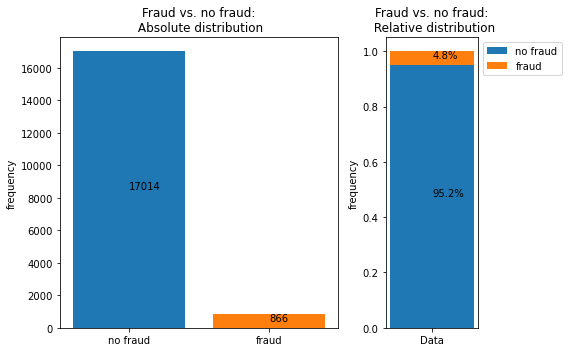

In [7]:
# plot fraud vs. non-fraud 
keys, counts = np.unique(data.fraudulent, return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(8, 5)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['no fraud', 'fraud'], counts, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('Fraud vs. no fraud:\n Absolute distribution') 
ax0 = plt.ylabel('frequency')
ax0 = plt.text(['no fraud'], counts[0]/2, counts[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(['fraud'], counts[1]/2, counts[1]) #add text box with count of fraudulent cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Data'], [counts_norm[0]], label='no fraud')
ax1 = plt.bar(['Data'], [counts_norm[1]], bottom=counts_norm[0], label='fraud')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Fraud vs. no fraud:\n Relative distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Data'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Data'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

Showing the distribution of fraudulent ads vs non fraudulent ads

<Figure size 720x432 with 0 Axes>

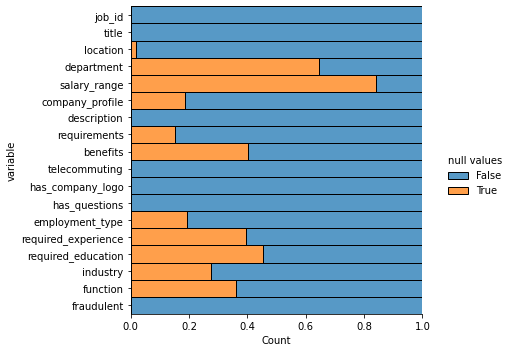

In [8]:
plt.figure(figsize=(10,6))
ax = sns.displot(
    data=data.isna().melt(value_name="null values"),
    y="variable",
    hue="null values",
    multiple="fill",
    aspect=1.25)

Showing the distibution of of null vs non null values for each variable

<AxesSubplot:xlabel='count', ylabel='variable'>

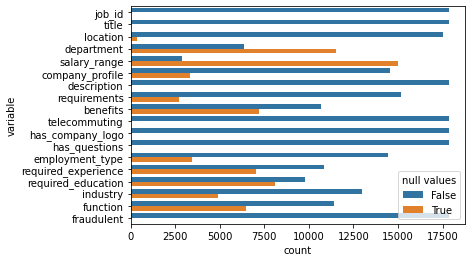

In [9]:
sns.countplot(data=data.isna().melt(value_name="null values"), y="variable", hue="null values")

Showing the count of null vs non null values

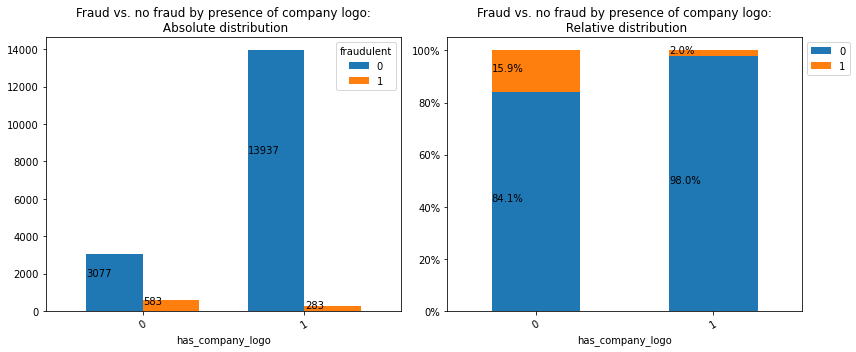

In [10]:
#frauds by incident cause
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['has_company_logo', 'fraudulent'])['fraudulent'].count().unstack().plot.bar(rot=30, ax=plt.gca(), width=0.7)
plt.title('Fraud vs. no fraud by presence of company logo:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['has_company_logo','fraudulent'])['fraudulent'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=30, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Fraud vs. no fraud by presence of company logo:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

Showing the distribution of fraudulent ads vs non fraudulent ads by the presence of a company logo in the ad

### Creating a copy of data before further processing:

In [11]:
for c in data.columns:
    print(c, len(data[c].unique()))

job_id 17880
title 11231
location 3106
department 1338
salary_range 875
company_profile 1710
description 14802
requirements 11969
benefits 6206
telecommuting 2
has_company_logo 2
has_questions 2
employment_type 6
required_experience 8
required_education 14
industry 132
function 38
fraudulent 2


In [12]:
df = data.copy()
df.shape

(17880, 18)

# 3. Feature engeneering

Thoughts on different attributes...

- job_id 17880 - irrelevant, to be dropped
- title 11231 - almost no null values to transform to binary, to be dropped
- location 3106 - needs to be parsed: extract country code, leave top 90% and the rest to be transormed to 'others'
- department 1338 - leave top 90% and the rest to be transormed to 'others'
- salary_range 875 - very important, convert to numeric
- company_profile 1710 - to be transformed to binary, yes/no
- description 14802 - out of scope for this model, almost no null values to transform to binary, to be dropped
- requirements 11969 - to be transformed to binary, yes/no
- benefits 6206 - to be transformed to binary, yes/no
- telecommuting 2 - no preprocessing needed
- has_company_logo 2 - no preprocessing needed
- has_questions 2 - no preprocessing needed
- employment_type 6 - no preprocessing needed
- required_experience 8 - no preprocessing needed
- required_education 14 - no preprocessing needed
- industry 132 - leave top 90% and the rest to be transormed to 'others'
- function 38 - leave top 90% and the rest to be transormed to 'others'
- fraudulent 2 - target variable

In [13]:
print(data.fraudulent.value_counts().to_string())

0    17014
1      866


## 3.1 Drop unnecessary features

Features to be dropped:
- irrelevant: job_id
- free text, out of scope: company_profile, requirements, description, benefits

In [14]:
df.drop(['job_id', 'description', 'title'], axis = 1, inplace = True)
df.head()

,location,department,salary_range,company_profile,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [15]:
df.shape

(17880, 15)

## 3.2 Salary feature

Creating features that would define the low margin of salary and the range.

In [16]:
df['salaryRange'] = data.salary_range.apply(lambda x: str(x).split('-'))

Defining salary margins:

In [17]:
df['salaryLow'] = df.salaryRange.str[0]
df['salaryHigh'] = df.salaryRange.str[1]

for c in ['salaryLow', 'salaryHigh']:
    df[c] = pd.to_numeric(df[c], errors = 'coerce')
    
df[df.salaryHigh.isna() == False].head()

,location,department,salary_range,company_profile,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,salaryRange,salaryLow,salaryHigh
6,"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,"[20000, 28000]",20000.0,28000.0
10,"US, NJ, Jersey City",NaN,100000-120000,NaN,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Benefits - FullBonus Eligible - YesInterview T...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,"[100000, 120000]",100000.0,120000.0
15,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0,"[120000, 150000]",120000.0,150000.0
23,"US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...","Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0,"[100000, 120000]",100000.0,120000.0
31,"US, KS,",NaN,50000-65000,NaN,Must Have's3+ years of experience with web-bas...,"Medical, Dental, Vision, Life, Disability, Pre...",0,1,0,Full-time,Associate,Unspecified,Computer Software,Engineering,0,"[50000, 65000]",50000.0,65000.0


In [18]:
print(len(data))
print(len(df))
#no records are lost

17880
17880


Defining salary range:

In [19]:
df['salaryFork'] = df.salaryHigh - df.salaryLow
df[df.salaryHigh.isna() == False].head()

,location,department,salary_range,company_profile,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,salaryRange,salaryLow,salaryHigh,salaryFork
6,"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,"[20000, 28000]",20000.0,28000.0,8000.0
10,"US, NJ, Jersey City",NaN,100000-120000,NaN,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Benefits - FullBonus Eligible - YesInterview T...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,"[100000, 120000]",100000.0,120000.0,20000.0
15,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0,"[120000, 150000]",120000.0,150000.0,30000.0
23,"US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...","Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0,"[100000, 120000]",100000.0,120000.0,20000.0
31,"US, KS,",NaN,50000-65000,NaN,Must Have's3+ years of experience with web-bas...,"Medical, Dental, Vision, Life, Disability, Pre...",0,1,0,Full-time,Associate,Unspecified,Computer Software,Engineering,0,"[50000, 65000]",50000.0,65000.0,15000.0


Removing unnecessary original feature:

In [20]:
df.drop(['salaryRange'], axis = 1, inplace = True)
df.head()

,location,department,salary_range,company_profile,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,salaryLow,salaryHigh,salaryFork
0,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,NaN,NaN,NaN
1,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,NaN,NaN
2,"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,NaN,NaN
4,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN,NaN,NaN


Visualising to see patterns (if any):
Looks like smaller salaries are associated with more fraud

Text(0, 0.5, 'Salary fork')

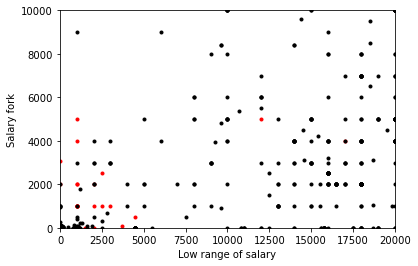

In [21]:
plt.figure()
plt.plot(df[df.fraudulent == 1]['salaryLow'], df[df.fraudulent == 1]['salaryFork'], 'r.')
plt.plot(df[df.fraudulent == 0]['salaryLow'], df[df.fraudulent == 0]['salaryFork'], 'k.')
plt.xlim([0, 20000])
plt.ylim([0, 10000])
plt.xlabel('Low range of salary')
plt.ylabel('Salary fork')

## 3.3 COUNTRY CODE FEATURE CREATION

In [22]:
df['countryCode'] = df['location'].apply(lambda x: str(x).split(',')[0])
df.head()

,location,department,salary_range,company_profile,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,salaryLow,salaryHigh,salaryFork,countryCode
0,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,NaN,NaN,NaN,US
1,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,NaN,NaN,NZ
2,"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,US
3,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,NaN,NaN,US
4,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN,NaN,NaN,US


In [23]:
print(df.countryCode.value_counts().to_string())

US     10656
GB      2384
GR       940
CA       457
DE       383
nan      346
NZ       333
IN       276
AU       214
PH       132
NL       127
BE       117
IE       114
SG        80
HK        77
PL        76
EE        72
IL        72
FR        70
ES        66
AE        54
EG        52
SE        49
RO        46
DK        42
ZA        40
BR        36
IT        31
FI        29
PK        27
LT        23
MY        21
QA        21
JP        20
RU        20
MX        18
PT        18
BG        17
TR        17
CN        15
CH        15
SA        15
MU        14
HU        14
AT        14
ID        13
MT        13
UA        13
CY        11
IQ        10
KR        10
TH        10
NG        10
AR         9
LU         9
BH         9
BY         9
PA         9
NO         8
RS         7
KE         7
CZ         6
LV         6
VN         4
NI         4
TT         4
TW         4
VI         3
KW         2
TN         2
AM         2
IS         2
LK         2
SK         2
CL         2
ZM         2
BD         2

Leaving countries that account for 90% of records, the rest to be transorrmed to 'others'

In [24]:
countryCodesToKeep = list(df.countryCode.value_counts()[df.countryCode.value_counts().cumsum()/len(df) < 0.90].index)
print(countryCodesToKeep)

['US', 'GB', 'GR', 'CA', 'DE', 'nan', 'NZ', 'IN', 'AU']


In [25]:
df['countryCode'][df.countryCode.isin(countryCodesToKeep) == False] = 'Other'
df.countryCode.value_counts()

/tmp/ipykernel_157/3652505234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countryCode'][df.countryCode.isin(countryCodesToKeep) == False] = 'Other'


US       10656
GB        2384
Other     1891
GR         940
CA         457
DE         383
nan        346
NZ         333
IN         276
AU         214
Name: countryCode, dtype: int64

In [26]:
#dropping original feature
df.drop(['location'], axis = 1, inplace = True)
df.head()

,department,salary_range,company_profile,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,salaryLow,salaryHigh,salaryFork,countryCode
0,Marketing,NaN,"We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,NaN,NaN,NaN,US
1,Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,NaN,NaN,NZ
2,NaN,NaN,Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,US
3,Sales,NaN,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,NaN,NaN,US
4,NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN,NaN,NaN,US


# 3.4 Department, industry and function

DEPARTMENT - leaving top 5 and 'others' to avoid the mess

In [27]:
departmentsToKeep = list(df.department.value_counts().index)[:5]
print(departmentsToKeep)

['Sales', 'Engineering', 'Marketing', 'Operations', 'IT']


In [28]:
df['department'][df.department.isin(departmentsToKeep) == False] = 'Other'
df.department.value_counts()

/tmp/ipykernel_157/130107557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['department'][df.department.isin(departmentsToKeep) == False] = 'Other'


Other          15946
Sales            551
Engineering      487
Marketing        401
Operations       270
IT               225
Name: department, dtype: int64

INDUSTRY

In [29]:
industriesToKeep = list(df.industry.value_counts()[df.industry.value_counts().cumsum()/len(df) < 0.40].index)
print(industriesToKeep)

['Information Technology and Services', 'Computer Software', 'Internet', 'Marketing and Advertising', 'Education Management', 'Financial Services', 'Hospital & Health Care']


In [30]:
df['industry'][df.industry.isin(industriesToKeep) == False] = 'Other'
df.industry.value_counts()

/tmp/ipykernel_157/4271722255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['industry'][df.industry.isin(industriesToKeep) == False] = 'Other'


Other                                  10782
Information Technology and Services     1734
Computer Software                       1376
Internet                                1062
Marketing and Advertising                828
Education Management                     822
Financial Services                       779
Hospital & Health Care                   497
Name: industry, dtype: int64

FUNCTION

In [31]:
functionsToKeep = list(df.function.value_counts()[df.function.value_counts().cumsum()/len(df) < 0.40].index)
print(functionsToKeep)

['Information Technology', 'Sales', 'Engineering', 'Customer Service', 'Marketing']


In [32]:
df['function'][df.function.isin(functionsToKeep) == False] = 'Other'
df.function.value_counts()

/tmp/ipykernel_157/1911206930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['function'][df.function.isin(functionsToKeep) == False] = 'Other'


Other                     11256
Information Technology     1749
Sales                      1468
Engineering                1348
Customer Service           1229
Marketing                   830
Name: function, dtype: int64

Checking fraudulent distribution with pivot tables

In [33]:
for c in ['department', 'industry', 'function']:
    
    try:
        print(df.pivot_table(values = 'fraudulent', index = c, aggfunc = np.mean).sort_values(by = 'fraudulent', ascending = False))
        print('\n')
    except:
        pass

             fraudulent
department             
Engineering    0.094456
Other          0.050483
Sales          0.021779
Marketing      0.004988
IT             0.004444
Operations     0.000000


                                     fraudulent
industry                                       
Hospital & Health Care                 0.102616
Other                                  0.064738
Marketing and Advertising              0.054348
Financial Services                     0.044929
Information Technology and Services    0.018454
Computer Software                      0.003634
Education Management                   0.000000
Internet                               0.000000


                        fraudulent
function                          
Engineering               0.083828
Customer Service          0.054516
Other                     0.053571
Sales                     0.027929
Information Technology    0.018296
Marketing                 0.012048




## 3.5 Binary feature creation: company_profile, requirements, benefits

Create features hasCompany_profile, hasrequirements etc

In [34]:
df['hasCompanyProfile'] = 0
df['hasCompanyProfile'][df.company_profile.isna() == False] = 1
df.hasCompanyProfile.value_counts()

/tmp/ipykernel_157/3349764736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hasCompanyProfile'][df.company_profile.isna() == False] = 1


1    14572
0     3308
Name: hasCompanyProfile, dtype: int64

In [35]:
df['hasRequirements'] = 0
df['hasRequirements'][df.requirements.isna() == False] = 1
df.hasRequirements.value_counts()

/tmp/ipykernel_157/3143652926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hasRequirements'][df.requirements.isna() == False] = 1


1    15185
0     2695
Name: hasRequirements, dtype: int64

In [36]:
df['hasBenefits'] = 0
df['hasBenefits'][df.benefits.isna() == False] = 1
df.hasBenefits.value_counts()

/tmp/ipykernel_157/1969415511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hasBenefits'][df.benefits.isna() == False] = 1


1    10670
0     7210
Name: hasBenefits, dtype: int64

In [37]:
df.drop(['company_profile', 'requirements', 'benefits', 'salary_range'], axis = 1, inplace = True)
df.head()

,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,salaryLow,salaryHigh,salaryFork,countryCode,hasCompanyProfile,hasRequirements,hasBenefits
0,Marketing,0,1,0,Other,Internship,NaN,Other,Marketing,0,NaN,NaN,NaN,US,1,1,0
1,Other,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,NaN,NaN,NZ,1,1,1
2,Other,0,1,0,NaN,NaN,NaN,Other,Other,0,NaN,NaN,NaN,US,1,1,0
3,Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,NaN,NaN,US,1,1,1
4,Other,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Other,0,NaN,NaN,NaN,US,1,1,1


# 4. Get_Dummies

In [38]:
df = pd.get_dummies(df, columns=["department", "employment_type", "required_experience", "required_education", "industry", 'function', 'countryCode'], 
                      prefix=["department", "employment_type", "required_experience", "required_education", "industry", 'function', 'countryCode']) #we add a prefix for easier identification

df.head().style

,telecommuting,has_company_logo,has_questions,fraudulent,salaryLow,salaryHigh,salaryFork,hasCompanyProfile,hasRequirements,hasBenefits,department_Engineering,department_IT,department_Marketing,department_Operations,department_Other,department_Sales,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Associate,required_experience_Director,required_experience_Entry level,required_experience_Executive,required_experience_Internship,required_experience_Mid-Senior level,required_experience_Not Applicable,required_education_Associate Degree,required_education_Bachelor's Degree,required_education_Certification,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma,industry_Computer Software,industry_Education Management,industry_Financial Services,industry_Hospital & Health Care,industry_Information Technology and Services,industry_Internet,industry_Marketing and Advertising,industry_Other,function_Customer Service,function_Engineering,function_Information Technology,function_Marketing,function_Other,function_Sales,countryCode_AU,countryCode_CA,countryCode_DE,countryCode_GB,countryCode_GR,countryCode_IN,countryCode_NZ,countryCode_Other,countryCode_US,countryCode_nan
0,0,1,0,0,nan,nan,nan,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,nan,nan,nan,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,nan,nan,nan,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,nan,nan,nan,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,nan,nan,nan,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


Remove nan values

In [39]:
print(len(df))
df.dropna(inplace = True)
print(len(df))

17880
2841


# 5. Data split

In [40]:
X, y = df.drop('fraudulent', axis = 1), df['fraudulent']
print(X.columns)

Index(['telecommuting', 'has_company_logo', 'has_questions', 'salaryLow',
       'salaryHigh', 'salaryFork', 'hasCompanyProfile', 'hasRequirements',
       'hasBenefits', 'department_Engineering', 'department_IT',
       'department_Marketing', 'department_Operations', 'department_Other',
       'department_Sales', 'employment_type_Contract',
       'employment_type_Full-time', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'required_experience_Associate', 'required_experience_Director',
       'required_experience_Entry level', 'required_experience_Executive',
       'required_experience_Internship',
       'required_experience_Mid-Senior level',
       'required_experience_Not Applicable',
       'required_education_Associate Degree',
       'required_education_Bachelor's Degree',
       'required_education_Certification', 'required_education_Doctorate',
       'required_education_High School or equivalent',
       'required_education

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(len(X_train), len(X_test))

1988 853


Visualisation:

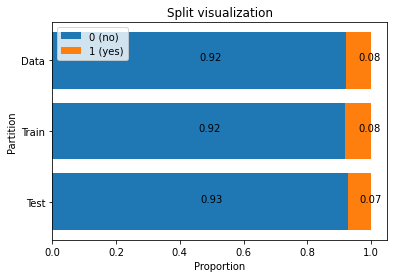

In [42]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)

fig, ax = plt.subplots()

ax.barh(['Test','Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='0 (no)')
ax.barh(['Test','Train','Data'], [test_dist[1], train_dist[1], data_dist[1]], left=[test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='1 (yes)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['Test', 'Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], [test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

# 6. Data rebalancing

In [43]:
smote = SMOTE(sampling_strategy='minority', random_state = 42)
X_sm, y_sm = smote.fit_resample(X_train, y_train) #ONLY APPLIED TO TRAINING!!!

New data split:

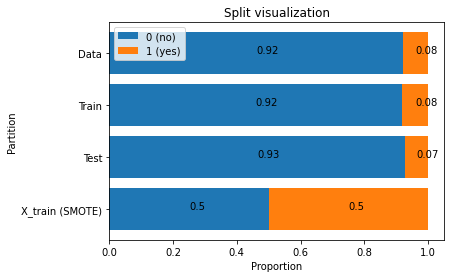

In [44]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)
smote_dist = pd.Series(y_sm).value_counts() / len(pd.Series(y_sm))

fig, ax = plt.subplots()

ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='0 (no)')
ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], left=[smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='1 (yes)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['X_train (SMOTE)', 'Test', 'Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

# 7. Model building

### 7.1 Decision tree

In [45]:
#Define Decision tree classifier with some default parameters
tree_bal = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3).fit(X_sm, y_sm)

y_pred_tree_bal = tree_bal.predict(X_test)
y_predProba_tree_bal = tree_bal.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_tree_bal)*100).round(2))

Accuracy is:  82.53


#### Feature importances:

In [46]:
d = []
for i in range(len(X_train.columns)):
    d.append({'feature':X_train.columns[i], 'importance':tree_bal.feature_importances_[i]})
results = pd.DataFrame(d)
results

,feature,importance
0,telecommuting,0.000000
1,has_company_logo,0.396257
2,has_questions,0.000000
3,salaryLow,0.140562
4,salaryHigh,0.000000
...,...,...
59,countryCode_IN,0.000000
60,countryCode_NZ,0.000000
61,countryCode_Other,0.000000
62,countryCode_US,0.000000


<AxesSubplot:ylabel='feature'>

<Figure size 432x288 with 0 Axes>

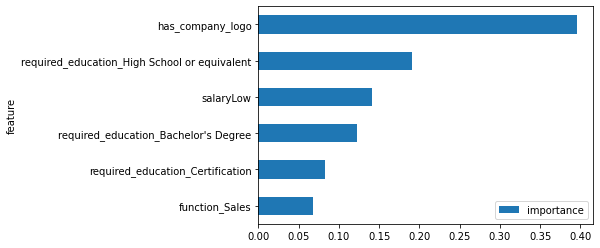

In [47]:
plt.figure()
results[results.importance != 0].sort_values(by = 'importance', ascending = True).plot.barh(x = 'feature', y = 'importance')

### 7.2 Random forest

In [48]:
#Create a Gaussian Classifier
forest_bal = RandomForestClassifier(n_estimators=100, criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
forest_bal.fit(X_sm, y_sm)

y_pred_forest_bal = forest_bal.predict(X_test)
y_predProba_forest_bal = forest_bal.predict_proba(X_test)

In [49]:
print("Accuracy:", (accuracy_score(y_test, y_pred_forest_bal) * 100).round(2))

Accuracy: 84.29


#### Feature importance

In [50]:
f = []
for i in range(len(X_train.columns)):
    f.append({'feature':X_train.columns[i], 'importance':forest_bal.feature_importances_[i]})
results_forest = pd.DataFrame(f)
results_forest

,feature,importance
0,telecommuting,0.002212
1,has_company_logo,0.185993
2,has_questions,0.056077
3,salaryLow,0.024161
4,salaryHigh,0.015761
...,...,...
59,countryCode_IN,0.001036
60,countryCode_NZ,0.000345
61,countryCode_Other,0.003257
62,countryCode_US,0.029875


<AxesSubplot:ylabel='feature'>

<Figure size 432x288 with 0 Axes>

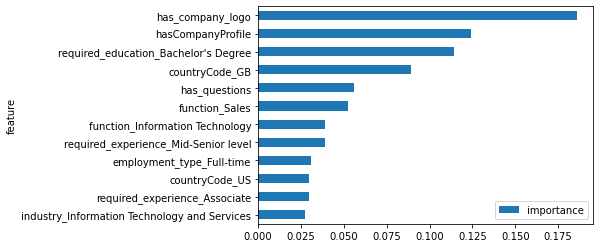

In [51]:
plt.figure()
results_forest[results_forest.importance > 0.025].sort_values(by = 'importance', ascending = True).plot.barh(x = 'feature', y = 'importance')

# 8. Model Evaluation: Decision Tree vs Random forest

### Confusion matrix

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

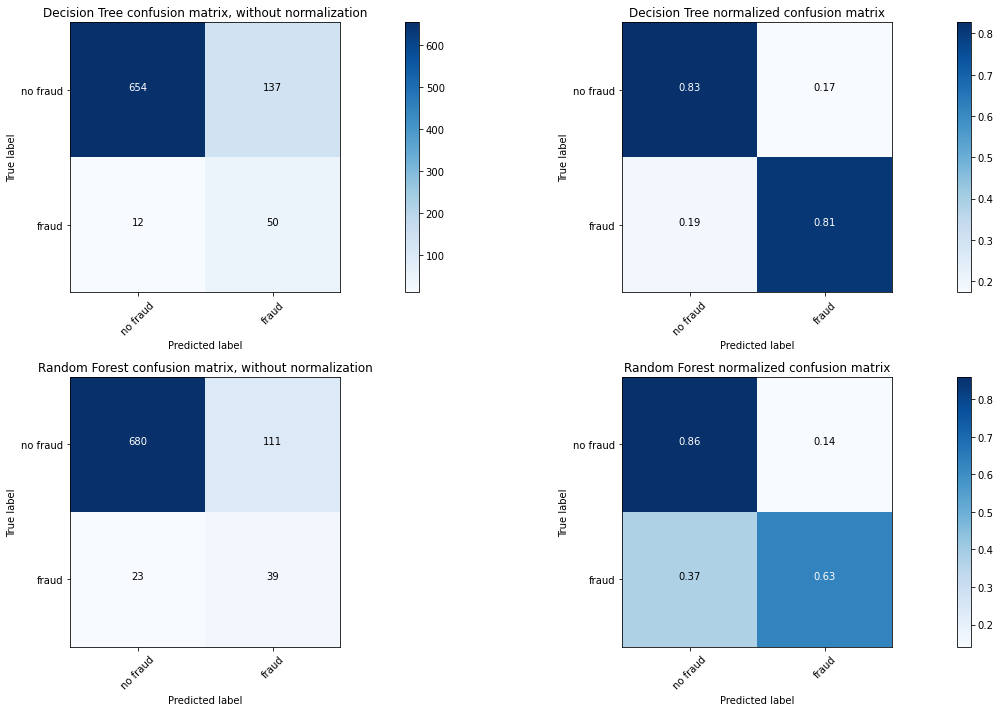

In [53]:
# Compute confusion matrix
class_names = ['no fraud', 'fraud']
cnf_matrix_tree_bal = confusion_matrix(y_test, y_pred_tree_bal)
cnf_matrix_forest_bal = confusion_matrix(y_test, y_pred_forest_bal)

np.set_printoptions(precision=2)
plt.figure(figsize=(26,10))

# Plot Decision Tree non-normalized confusion matrix
plt.subplot(221) 
plot_confusion_matrix(cnf_matrix_tree_bal, classes=class_names,
                      title='Decision Tree confusion matrix, without normalization')

# Plot Decision Tree normalized confusion matrix
plt.subplot(222) 
plot_confusion_matrix(cnf_matrix_tree_bal, classes=class_names, normalize=True,
                      title='Decision Tree normalized confusion matrix')

#Plot Random Forest non-normalized confusion matrix
plt.subplot(223) 
plot_confusion_matrix(cnf_matrix_forest_bal, classes=class_names,
                      title='Random Forest confusion matrix, without normalization')

#Plot Random Forest normalized confusion matrix
plt.subplot(224) 
plot_confusion_matrix(cnf_matrix_forest_bal, classes=class_names, normalize=True,
                      title='Random Forest normalized confusion matrix')


plt.tight_layout()
plt.show()

Decision Tree model gets correctly more 'fraud' cases and but fewer 'no fraud' cases than Random Forest model.

# 9. Bag of words models

## 9.1 Transform database rows to text representation

Join each column in a row to a single string. Remove all characters from substrings that are not letters. 

In [54]:
df_words = data.copy()
X_w, y_w = df_words.drop('fraudulent', axis = 1), df_words['fraudulent']
X_w=list(map(lambda row: ' '.join(str(x) for x in row), X_w.values))
X_w=list(map(lambda row: re.sub("[^a-zA-Z]|nan"," ", row), X_w))

## 9.2 Transform text representation to bag of words

Count each distinct word that is not a stop word. Transform each dataset row to a vector that holds information on how many of each distinct words the row contains.

In [55]:
vectorizer = CountVectorizer(lowercase=True, stop_words='english')
vectorizer.fit(X_w)
d = vectorizer.vocabulary_
headOfDict = {k: d[k] for k in list(d)[:5]}
print(headOfDict)
X_w = vectorizer.transform(X_w)

{'marketing': 50259, 'intern': 43114, 'ny': 56027, 'new': 55279, 'york': 95928}


## 9.3 Split the data

In [56]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size = 0.3, random_state = 42)

## 9.4 Rebalance the data

As previously seen, there are far too many non fraudlent job postings when compared to fraudlent ones. Let's balance the training data with SMOTE.

In [57]:
smote = SMOTE(sampling_strategy='minority', random_state = 42)
X_sm_w, y_sm_w = smote.fit_resample(X_train_w, y_train_w) 

## 9.5 Train the models

Train Naive bayes and logistic regression models with bag of words vectors

In [58]:
naive = MultinomialNB()
nb_classifier = naive.fit(X_sm_w,y_sm_w)
nb_predict = nb_classifier.predict(X_test_w)

logistic = LogisticRegression(max_iter=500)
lg_classifier = logistic.fit(X_sm_w,y_sm_w)
lg_predict = lg_classifier.predict(X_test_w)

print("Accuracy:", (accuracy_score(y_test_w, nb_predict) * 100).round(2))
print("Accuracy:", (accuracy_score(y_test_w, lg_predict) * 100).round(2))

Accuracy: 97.95
Accuracy: 97.52


## 9.6 Confusion matrix of the bag of words models

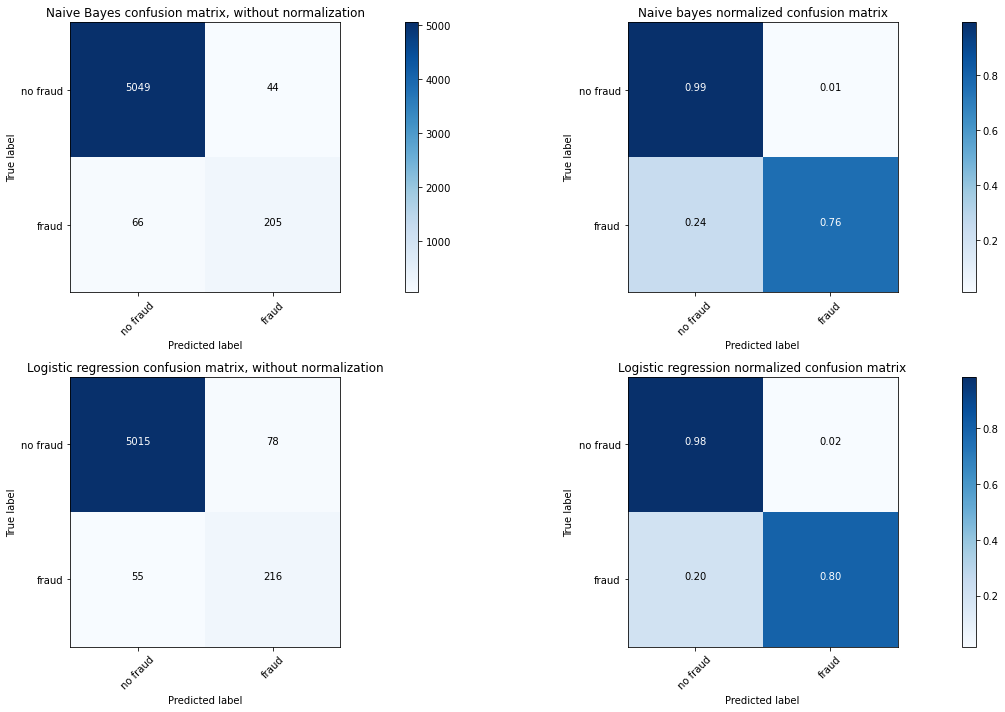

In [59]:
class_names = ['no fraud', 'fraud']
nb_conf = confusion_matrix(y_test_w, nb_predict)
lg_conf = confusion_matrix(y_test_w, lg_predict)

np.set_printoptions(precision=2)
plt.figure(figsize=(26,10))

# Plot Naive Bayes non-normalized confusion matrix
plt.subplot(221) 
plot_confusion_matrix(nb_conf, classes=class_names,
                      title='Naive Bayes confusion matrix, without normalization')

# Plot Naive Bayes normalized confusion matrix
plt.subplot(222) 
plot_confusion_matrix(nb_conf, classes=class_names, normalize=True,
                      title='Naive bayes normalized confusion matrix')

# Plot Logistic regression non-normalized confusion matrix
plt.subplot(223) 
plot_confusion_matrix(lg_conf, classes=class_names,
                      title='Logistic regression confusion matrix, without normalization')

# Plot Logistic regression normalized confusion matrix
plt.subplot(224) 
plot_confusion_matrix(lg_conf, classes=class_names, normalize=True,
                      title='Logistic regression normalized confusion matrix')

plt.tight_layout()
plt.show()

According to matrices, bag of words models identify non fraudlent postings with high accuracy. However, when identifying fraudlent postings, the bag of words models offer similar accuracy to previously introduced models.

## 9.7 Bag of words feature importance

/opt/software/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


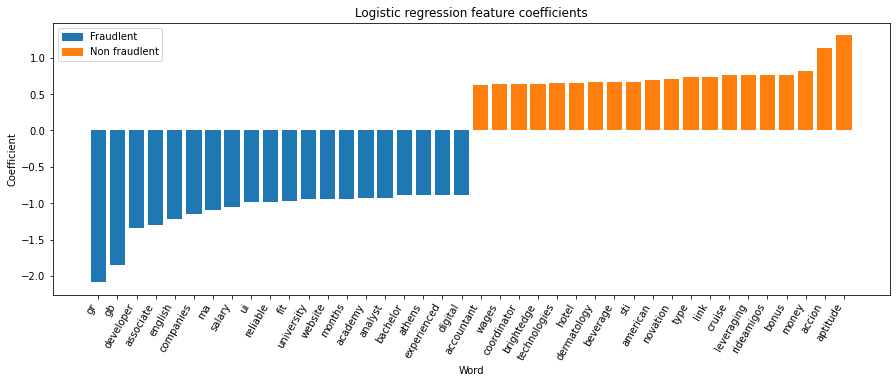

In [60]:
def plot_and_return_top_features(classifier, vectorizer, top_features=10):
    """
    Heavily referenced from the datacamp tweet classification project, which adapted this from
    https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
    and https://stackoverflow.com/a/26980472 by @kjam
    """
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:top_features]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-top_features:]
    top_coefficients = np.hstack([topn_class1, topn_class2])
    if set(topn_class1).union(topn_class2):
        top_coefficients = topn_class1
        for ce in topn_class2:
            if ce not in topn_class1:
                top_coefficients.append(ce)
    plt.figure(figsize=(15, 5))
    colors = ['#1f77b4' if c < 0 else '#ff7f0e' for c in [tc[0] for tc in top_coefficients]]
    plt.bar(np.arange(len(top_coefficients)), [tc[0] for tc in top_coefficients], color=colors)
    plt.xticks(np.arange(len(top_coefficients)),
               [tc[1] for tc in top_coefficients], rotation=60, ha='right')
    plt.xlabel('Word')
    plt.ylabel('Coefficient')
    blue_patch = mpatches.Patch(color='#1f77b4', label='Fraudlent')
    orange_patch = mpatches.Patch(color='#ff7f0e', label='Non fraudlent')
    plt.legend(handles=[blue_patch, orange_patch])
    plt.title(label="Logistic regression feature coefficients")
    plt.show()

plot_and_return_top_features(lg_classifier, vectorizer, top_features=20)

# 10. Comparison of best models: decision tree and logistic regression (bag-of-words


This part analyses whether logistics regression and decision tree predict fraudulent correctly for the same observations in order to decide whether models complement each other. The models are using different datasets, hence analysis be done on the overlapped observations.

In [61]:
print('number of test rows for decision tree: ' + str(len(y_test)))
print('number of test rows for logistic regression: ' + str(len(y_test_w)))
print('number of overlapping rows: ' + str(len([x for x in y_test.index if x in y_test_w.index])))

number of test rows for decision tree: 853
number of test rows for logistic regression: 5364
number of overlapping rows: 274


Creating new dataframes with indexes for both test sets for cross reference

In [62]:
#dataframe for logictic regression
predictions = pd.DataFrame()
predictions.index = y_test_w.index 
predictions['Words_LG'] = lg_predict #predictions of logistic regression
predictions['Test'] = y_test_w #correct answers

predictions.head()

,Words_LG,Test
4708,0,0
11079,0,0
12357,0,0
14511,0,0
16691,0,0


In [63]:
#dataframe for decision tree
predictions_sasha = pd.DataFrame()
predictions_sasha.index = y_test.index
predictions_sasha['DT'] = y_pred_tree_bal
predictions_sasha['Test'] = y_test
predictions_sasha.head()

,DT,Test
2653,0,0
14353,0,0
7177,1,1
7018,0,0
7709,1,0


In [64]:
#merging dataframes
predictions = predictions.join(predictions_sasha, how = 'inner', rsuffix ='r')
predictions.head()

,Words_LG,Test,DT,Testr
11079,0,0,0,0
5363,0,0,0,0
16927,0,0,0,0
14049,0,0,1,0
9835,0,0,0,0


Comparison:

In [65]:
#number of fraudulent observations in overlapping dataset = 18
len(predictions[predictions['Test'] == 1])

18

In [66]:
#number of fraudulent observations that both models got correctly = 10/18
len(predictions[(predictions.Test == 1) & (predictions.DT == 1) & (predictions.Words_LG == 1)])

10

In [67]:
#number of fraudulent observations that were missed by both models = 2/18
len(predictions[(predictions.Test == 1) & (predictions.DT == 0) & (predictions.Words_LG == 0)])

2

In [68]:
#number of fraudulent observations that decision tree got correctly but logistic regression didn't = 5/18
len(predictions[(predictions.Test == 1) & (predictions.DT == 1) & (predictions.Words_LG == 0)])

5

In [69]:
#number of fraudulent observations that logistic regression got correctly but decision tree didn't = 1/18
len(predictions[(predictions.Test == 1) & (predictions.DT == 0) & (predictions.Words_LG == 1)])

1

Summary:

18 fraudulent job postings are in the shared part of test data:
<br>10 were correctly predicted by both models (10/18 = 56%)
<br> 2 were completely missed by both models (2/18 = 11%)
<br>5 were caught by decision tree, not text mining (5/18 = 27%)
<br>1 were caught by text mining, not decision tree (1/18 = 6%)

--> in this small sample, we could have captured 16/18 (compared to 10/18) fraudulent postings if models were used together. It means 38% more fraudulent job posting would have been captured. The dataset might be too small to call this figure representative, however on bigger dataset this difference can be more significant.


Final recommendation: bag-of-word models can be computationally heavy, hence we recomend using decision tree and if it yields result with a fairly low accuracy (eg. <70%), the observation can be double checked with logistic regression model.